# Module 2: Stepping Through An Image

"The basic technical distinction between analog(continous) and digital(discrete) representations is crucial(...)&ndash;  Rolling down a ramp is continous motion, but walking down stairs is a sequence of discrete steps&ndash;so you can count the number of steps, but not the number of levels on the ramp." &ndash; William Mitchell (The Reconfigured Eye)
****

### The Discrete Digital World

In the previous Module we examined a 200 x 200 digital image with a total of 40,000 individual pixels.  This is a key point to understand as we move into searching, transforming, and making predictions from digital image data. We can add more and more pixels to our grid to increase the resolution of our image but it will always have a set upper limit, in our case 40,000.  There is never a fraction of a pixel, we are dealing only with postive whole numbers ( unsigned integer in programming).  The discrete nature of our data allows us to step through each individual pixel, preforming whatever operation is desired.  

Let's search through our image checking for white and black pixels.

Pixel # 17688  is the color white
Pixel # 18545  is the color white
Pixel # 20586  is the color white
Pixel # 33785  is the color white
Pixel # 35983  is the color white
There are 5 white pixels.


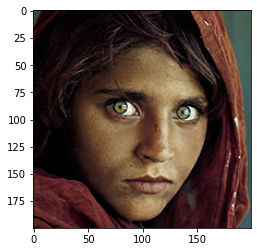

In [91]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('Graphics/face.png')

#OpenCV by defualt uses BGR instead of RGB.  Old digital camera standard.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(img)

#Save the height and width
h = img.shape[0]
w = img.shape[1]

#Save the the RGB vales for white & black.
white = np.array([255,255,255])
black = np.array([0,0,0])

#Loop through the pixel array testing if the pixel is white.

#A counting variable so we can keep track how many values we have.
count = 0

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row.
    for x in range(0,w):
        #If the RGB values equal white.
        if np.array_equal(img[y,x],white):
            #Print the array location.  Remember the Location Algorithm (x + y * width).
            print("Pixel #",x+(y*w)," is the color white")
            count+=1

print("There are",count,"white pixels.")

Pixel # 128  is the color black
Pixel # 319  is the color black
Pixel # 343  is the color black
Pixel # 491  is the color black
Pixel # 543  is the color black
Pixel # 544  is the color black
Pixel # 744  is the color black
Pixel # 841  is the color black
Pixel # 893  is the color black
Pixel # 909  is the color black
Pixel # 941  is the color black
Pixel # 944  is the color black
Pixel # 1038  is the color black
Pixel # 1084  is the color black
Pixel # 1088  is the color black
Pixel # 1105  is the color black
Pixel # 1145  is the color black
Pixel # 1289  is the color black
Pixel # 1321  is the color black
Pixel # 1346  is the color black
Pixel # 1419  is the color black
Pixel # 1486  is the color black
Pixel # 1490  is the color black
Pixel # 1496  is the color black
Pixel # 1546  is the color black
Pixel # 1711  is the color black
Pixel # 1730  is the color black
Pixel # 1746  is the color black
Pixel # 1930  is the color black
Pixel # 1947  is the color black
Pixel # 2016  is the c

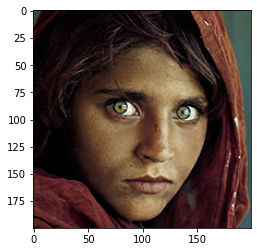

In [92]:
#Now let's test for black values

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(img)

#Set our count variable to zero.
count = 0

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row.
    for x in range(0,w):
        #If the RGB values equal white.
        if np.array_equal(img[y,x],black):
            #Print the array location.  Remember the Location Algorithm (x + y * width).
            print("Pixel #",x+(y*w)," is the color black")
            count+=1

print("There are",count,"black pixels.")

There are only 5 white pixels and 401 black pixels.  Visually this makes sense, the large dark areas in her hair are where most of the black values exist.  Her eyes may look like they are filled with white but our data is telling us different.  You can't make assumptions by what you are seeing on your monitor.   

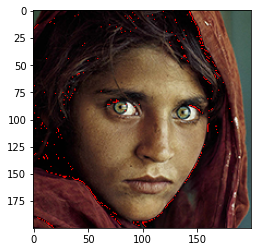

In [93]:
#Let's turn the black pixels red to show there location.

#Let's save a copy of the image.
imgRed = copy.deepcopy(img)

#Save the RGB value for red.
red = np.array([255,0,0])

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row.
    for x in range(0,w):
        #If the RGB values equal black.
        if np.array_equal(imgRed[y,x],black):
            #Turn the black pixel red.
            imgRed[y,x] = red

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(imgRed)

### Our First Image Filter

So far we have searched the pixel array for values that exactly match black or white.  What if you wanted to select all pixels above a certain brightness value?  This seems like a useful tool if you wanted to select those light values in her eyes and face that are not quite 100% white or the dark areas that make up her hair.  The segmenting of an image in this fashion is called **Thresholding**.  

With Thresholding you are setting a fixed value as your dividing point between selected pixels and deselected pixels.  If your pixel value(s) is above the threshold it is selected and if it is below it is delected.  The convention is to save selected pixels in white and deselected pixels in black.  Every pixel will fit into either of these classes which will result in a binary image.

There are many ways to calculate the brightness, luminiance, or grey value of RGB color.  For simplicity sake lets choose the grey value for our thresold.  The following code will take you through the process.
 



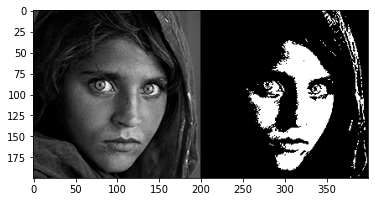

In [105]:
#Let's turn the black pixels red to show there location

#Let's copy our image and create a blank image array to store our threshold.
imgGrey = copy.deepcopy(img)
imgThres = np.zeros((200,200,3), dtype=np.uint8)

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row
    for x in range(0,w):

        #Converting the color image to greyscale.  Average method.  Divide R,G,B values by 3 and sum them. 
        imgGrey[x,y,0] = img[x,y,0]/3 + img[x,y,1]/3 + img[x,y,2]/3
        imgGrey[x,y,1] = img[x,y,0]/3 + img[x,y,1]/3 + img[x,y,2]/3
        imgGrey[x,y,2] = img[x,y,0]/3 + img[x,y,1]/3 + img[x,y,2]/3

        #Converting a color image to greyscale.  Weighted Method. Weight according to there wavelengths  Formula = ((Red value X 0.299) + (Green value X 0.587) + (Blue value X 0.114)) 
        # imgThres[x,y,0] = img[x,y,0] * 0.299 + img[x,y,1] * 0.587 + img[x,y,2] * 0.114
        # imgThres[x,y,1] = img[x,y,0] * 0.299 + img[x,y,1] * 0.587 + img[x,y,2] * 0.114
        # imgThres[x,y,2] = img[x,y,0] * 0.299 + img[x,y,1] * 0.587 + img[x,y,2] * 0.114

        #Threshold filter on the pixel.

        #If the pixel value is above 100 set it to white.  If it is below 100 set it to black.
        if (imgGrey[x,y,0] > 100):
            imgThres[x,y] = white
        else:
            imgThres[x,y] = black
        

#Combine the greyscale and the thresholded image along the so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((imgGrey, imgThres), axis=1)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(imgTwo)

